In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import io, os, sys, types
import import_ipynb
import helper
from helper import draw_clusters

# Import the Movies dataset
movies = pd.read_csv('movies_small.csv')
movies.head()

# Import the ratings dataset
ratings = pd.read_csv('ratings_small.csv')
ratings.head()



# Function to get the genre ratings
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings


# Calculate the average rating of romance and scifi movies
genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

avg_romance_rating  avg_scifi_rating
1                3.50              2.40
2                3.59              3.80
3                3.69              3.17
4                4.52              4.31
5                4.16              3.67

In [2]:
# pip install import-ipynb

  Stored in directory: C:\Users\Shiv\AppData\Local\pip\Cache\wheels\b4\7b\e9\a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Function to get the biased dataset
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset
# Bias the dataset
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)
# Printing the resulting number of records & the head of the dataset
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  189


index  avg_romance_rating  avg_scifi_rating
0      1                3.50              2.40
1      3                3.69              3.17
2      6                3.00              2.50
3      7                2.93              3.36
4     12                2.67              1.83

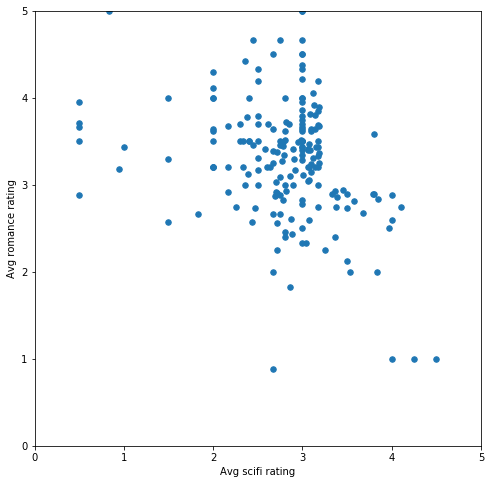

In [6]:
# Defining the scatterplot drawing function
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)
# Plot the scatterplot
draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

In [7]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
#plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)
# Plot
#draw_clusters(biased_dataset, predictions)

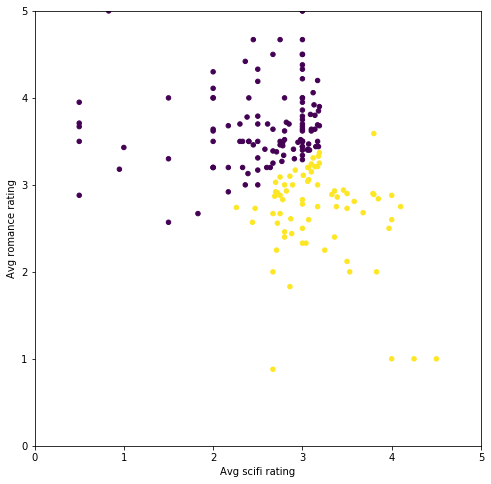

In [8]:
# TODO: Import KMeans
from sklearn.cluster import KMeans

# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions)

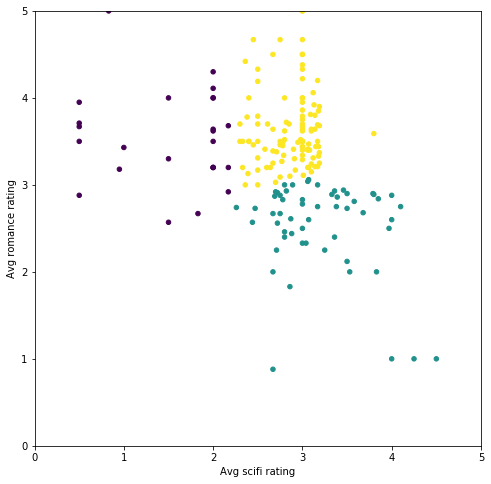

In [9]:
#Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)

# TODO: use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_2)

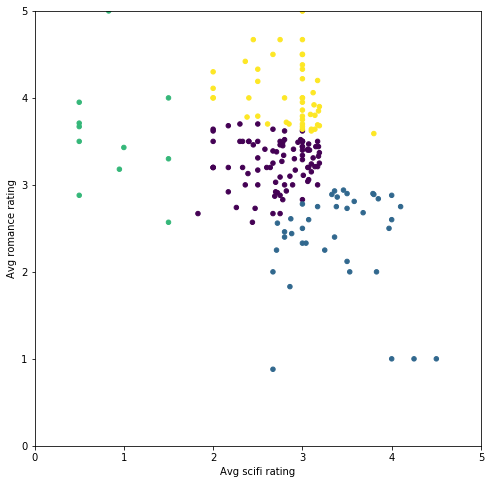

In [10]:
# Create an instance of KMeans to find three clusters
kmeans_3 = KMeans(n_clusters=4)

# TODO: use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_3)

In [11]:
df = biased_dataset[['avg_scifi_rating','avg_romance_rating']]

# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)

# Calculate error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]

C:\Users\Shiv\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (178) found smaller than n_clusters (182). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\Shiv\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (178) found smaller than n_clusters (187). Possibly due to duplicate points in X.
  return_n_iter=True)


In [12]:
# Optional: Look at the values of K vs the silhouette score of running K-means with that value of k
list(zip(possible_k_values, errors_per_k))

[(2, 0.3266456704956893),
 (7, 0.40929552050762497),
 (12, 0.38756446440683484),
 (17, 0.3865050172506345),
 (22, 0.392516427582453),
 (27, 0.39515163432285233),
 (32, 0.3845093452458765),
 (37, 0.38910513341909164),
 (42, 0.3965439793326495),
 (47, 0.37310276643065166),
 (52, 0.3945824091711026),
 (57, 0.3917350044551166),
 (62, 0.36602777041895235),
 (67, 0.35988574694525644),
 (72, 0.3788549188930544),
 (77, 0.3743596264881078),
 (82, 0.3776503947722098),
 (87, 0.3755528051844364),
 (92, 0.38361600541039104),
 (97, 0.3679295390273642),
 (102, 0.37611923084655174),
 (107, 0.3552976545682283),
 (112, 0.35361096201653913),
 (117, 0.34581797657714036),
 (122, 0.3256222932553252),
 (127, 0.31091022478747016),
 (132, 0.30181688368065324),
 (137, 0.2837860155890655),
 (142, 0.2715548886251604),
 (147, 0.2644561254520884),
 (152, 0.24793901905573865),
 (157, 0.2187378414997205),
 (162, 0.19083702776958286),
 (167, 0.17249885749421592),
 (172, 0.14278274587738987),
 (177, 0.10911758362273699

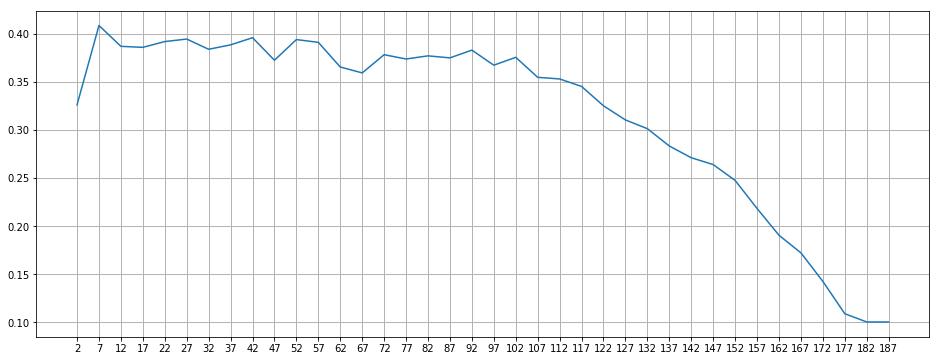

In [13]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

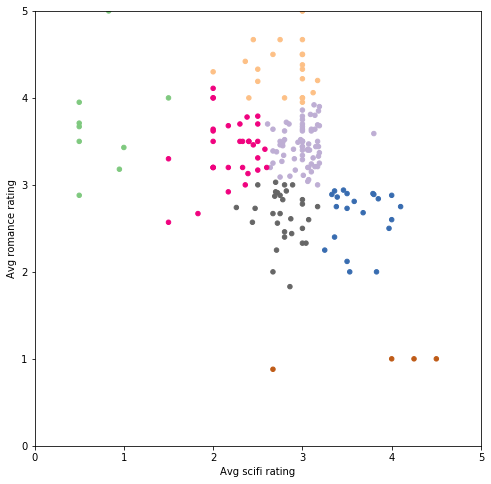

In [14]:
# Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7)

# TODO: use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# Plot
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent')

In [15]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies,
                                                     ['Romance', 'Sci-Fi', 'Action'],
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  186


index  avg_romance_rating  avg_scifi_rating  avg_action_rating
0      1                3.50              2.40               2.80
1      3                3.69              3.17               3.68
2      6                3.00              2.50               3.08
3      7                2.93              3.36               3.29
4     12                2.67              1.83               3.11

In [16]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                                           'avg_romance_rating',
                                                           'avg_action_rating']].values

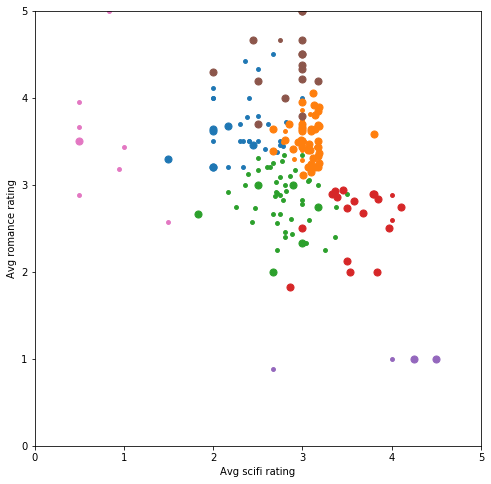

In [17]:
# TODO: Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7)

# TODO: use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)

# plot
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

In [18]:
# Merge the two tables then pivot so we have Users X Movies dataframe

from IPython.display import display, HTML

ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )

display(HTML(ratings_title.head(10).to_html()))

user_movie_ratings=pd.pivot_table(ratings_title,index=["userId"],columns=["title"],values=["rating"])
display(HTML(user_movie_ratings.head(10).to_html()))



In [19]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


rating                      \
title Forrest Gump (1994) Pulp Fiction (1994)   
653                   4.0                 5.0   
29                    5.0                 5.0   
72                    5.0                 5.0   
508                   4.0                 5.0   
14                    1.0                 5.0   

                                                                         \
title Shawshank Redemption, The (1994) Silence of the Lambs, The (1991)   
653                                5.0                              4.5   
29                                 5.0                              4.0   
72                                 5.0                              4.5   
508                                4.0                              4.0   
14                                 2.0                              5.0   

                                                                      \
title Star Wars: Episode IV - A New Hope (1977) Jurassic Park (1993)   
653                                         5.0                  4.5   
29                                          4.0                  4.0   
72                                          4.5                  4.0   
508                                         5.0                  3.0   
14                                          5.0                  3.0   

                                                                   \
title Matrix, The (1999) Toy Story (1995) Schindler's List (1993)   
653                  5.0              5.0                     5.0   
29                   3.0              4.0                     5.0   
72                   4.5              5.0                     5.0   
508                  4.5              3.0                     5.0   
14                   5.0              2.0                     4.0   

                                         ...                            \
title Terminator 2: Judgment Day (1991)  ... Dances with Wolves (1990)   
653                                 5.0  ...                       4.5   
29                                  4.0  ...                       5.0   
72                                  3.0  ...                       4.5   
508                                 2.0  ...                       5.0   
14                                  4.0  ...                       3.0   

                                                    \
title Fight Club (1999) Usual Suspects, The (1995)   
653                 5.0                        5.0   
29                  4.0                        5.0   
72                  5.0                        5.0   
508                 4.0                        5.0   
14                  5.0                        5.0   

                                                                               \
title Seven (a.k.a. Se7en) (1995) Lion King, The (1994) Godfather, The (1972)   
653                           4.5                   5.0                   4.5   
29                            4.0                   3.0                   5.0   
72                            5.0                   5.0                   5.0   
508                           4.0                   3.5                   5.0   
14                            5.0                   4.0                   5.0   

                                         \
title Apollo 13 (1995) True Lies (1994)   
653                5.0              4.0   
29                 5.0              4.0   
72                 3.5              3.0   
508                3.0              2.0   
14                 3.0              4.0   

                                                               
title Twelve Monkeys (a.k.a. 12 Monkeys) (1995) Batman (1989)  
653                                         5.0           4.5  
29                                          2.0           4.0  
72                                          5.0           4.0  
508                                         4.0           2.0  
14      

AttributeError: Can only use .str accessor with Index, not MultiIndex

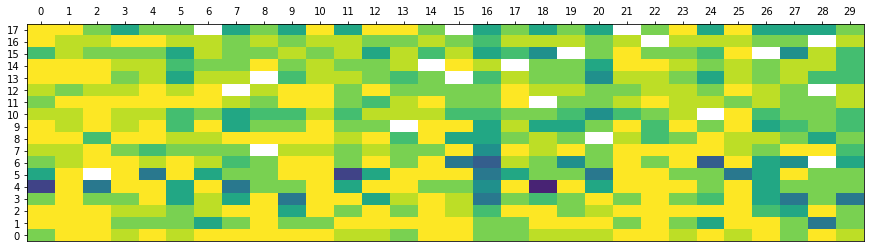

In [26]:
# Print the heatmap

#helper.draw_movies_heatmap(most_rated_movies_users_selection)

In [21]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)

In [22]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

In [23]:
# 20 clusters
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)

C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 8
# of users in cluster: 289. # of users in plot: 70


C:\Users\Shiv\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


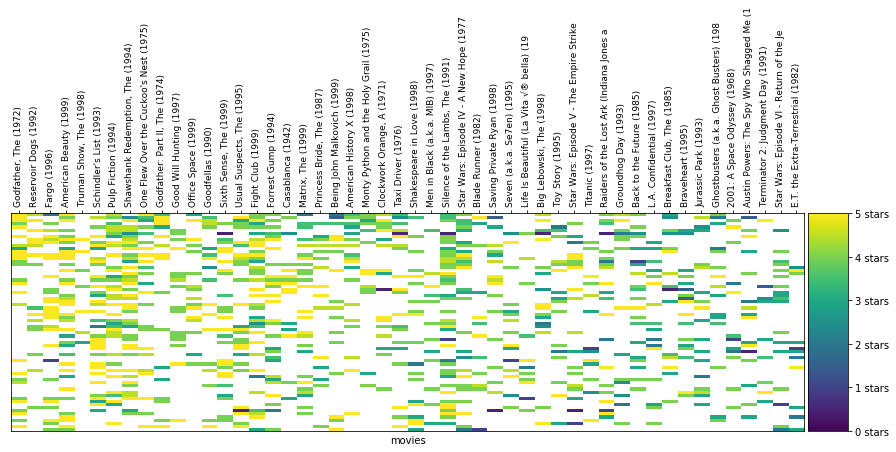

C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Shiv\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 11
# of users in cluster: 70. # of users in plot: 70


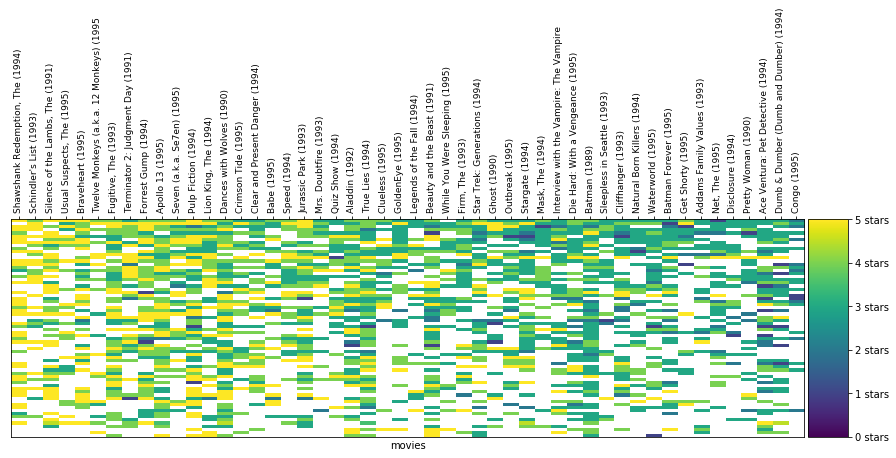

C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 0
# of users in cluster: 35. # of users in plot: 35


C:\Users\Shiv\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


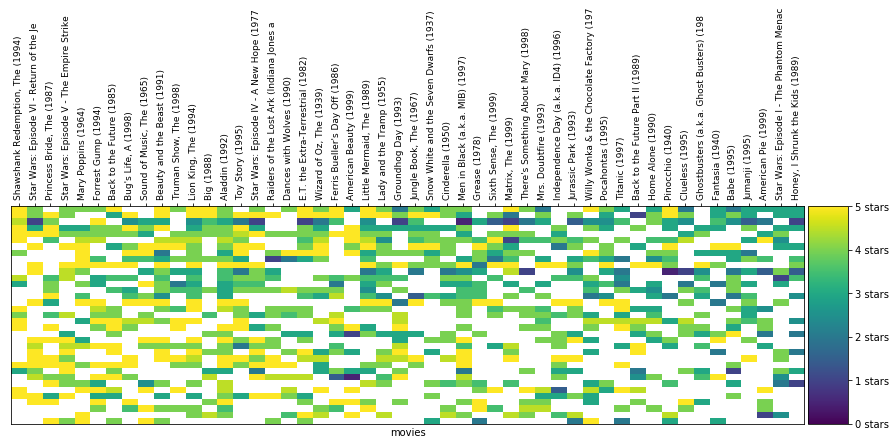

C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Shiv\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 1
# of users in cluster: 105. # of users in plot: 70


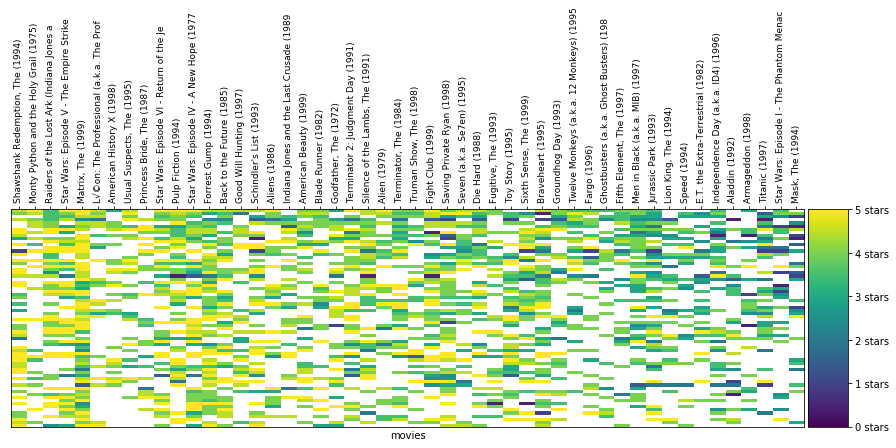

C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 6
# of users in cluster: 46. # of users in plot: 46


C:\Users\Shiv\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


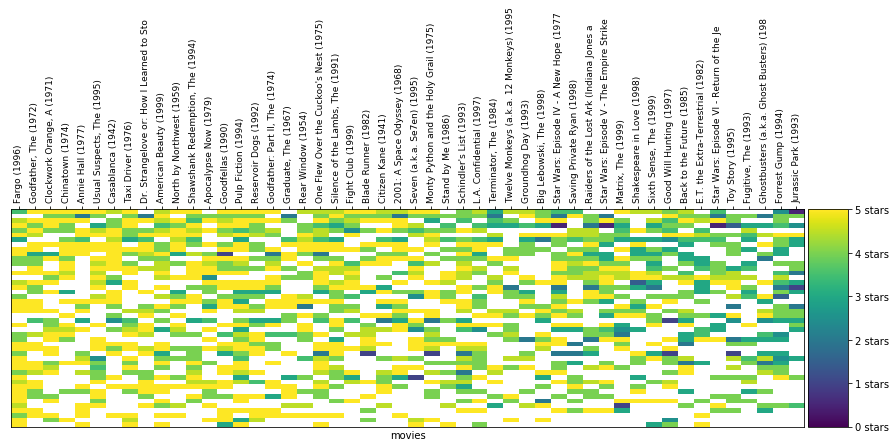

C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Shiv\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 9
# of users in cluster: 36. # of users in plot: 36


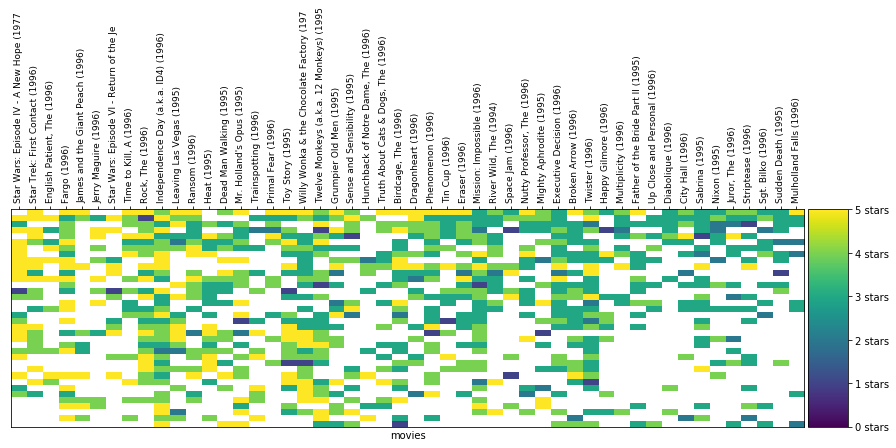

C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 3
# of users in cluster: 17. # of users in plot: 17


C:\Users\Shiv\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


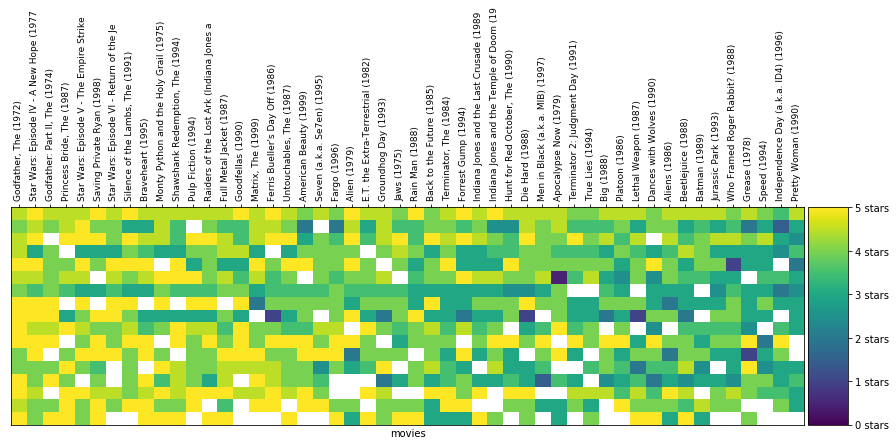

C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)


cluster # 19
# of users in cluster: 25. # of users in plot: 25


C:\Users\Shiv\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


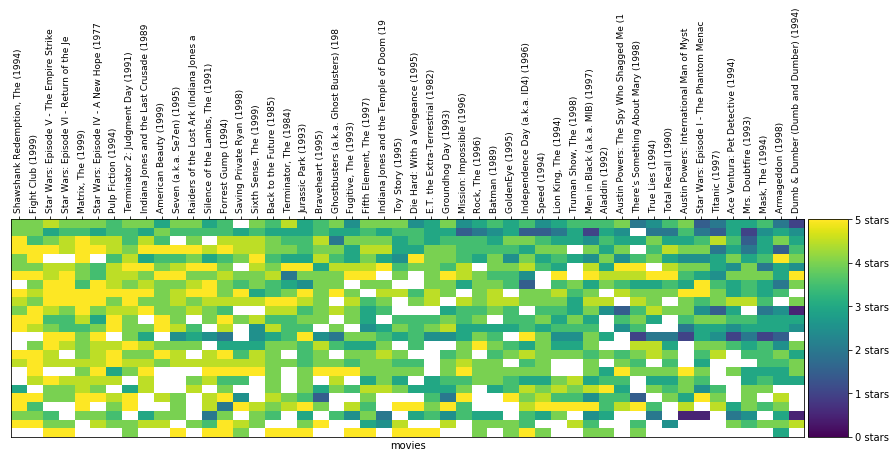

C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Shiv\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


cluster # 7
# of users in cluster: 21. # of users in plot: 21


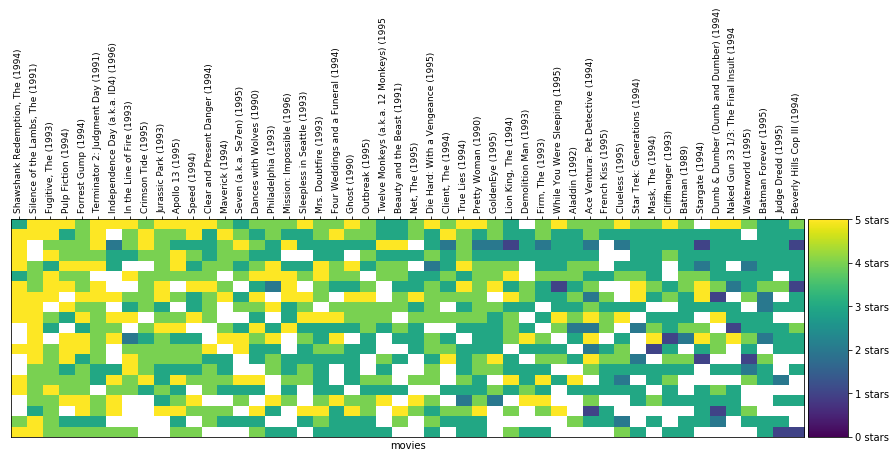

C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:119: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
C:\Users\Shiv\Documents\DataMining\Project_Kmeans\helper.py:120: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
C:\Use

In [24]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)

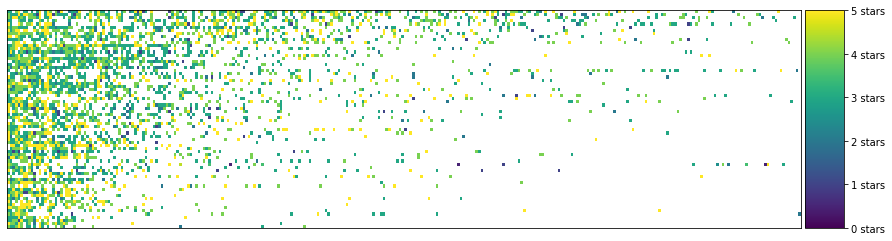

In [25]:
#Pick a cluster ID from the clusters above
cluster_number = 11

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)

In [57]:
cluster.fillna('').head()

Forrest Gump (1994)  Quiz Show (1994)  On Golden Pond (1981)  \
0                  5.0               3.0                    3.0   
1                  4.0               3.0                    4.0   
2                  4.0               4.0                    5.0   

   Get Shorty (1995)  Dead Poets Society (1989)  \
0                3.0                        3.0   
1                3.0                        4.0   
2                5.0                        4.0   

   Wings of Desire (Himmel √ºber Berlin, Der) (1987)  \
0                                                5.0   
1                                                5.0   
2                                                5.0   

   Blues Brothers, The (1980)  Glengarry Glen Ross (1992)  \
0                         5.0                         5.0   
1                         4.0                         4.0   
2                         4.0                         4.0   

   Monty Python's Life of Brian (1979)  \
0                                  3.0   
1                                  4.0   
2                                  4.0   

   Nightmare Before Christmas, The (1993)  ...  Patton (1970)  \
0                                     4.0  ...              3   
1                                     3.0  ...              5   
2                                     2.0  ...                  

   Snow White and the Seven Dwarfs (1937)  Real Genius (1985)  \
0                                       4                   4   
1                                       4                   4   
2                                                               

   Crow, The (1994)  Notorious (1946)  Flirting With Disaster (1996)  \
0                 3                 4                              3   
1                 3                                                    
2                                   5                              1   

   True Romance (1993)  Immortal Beloved (1994)  English Patient, The (1996)  \
0                    3                        3                            3   
1                    4                        4                                
2                                                                          5   

   Young Frankenstein (1974)  
0                          4  
1                             
2                          4  

[3 rows x 300 columns]

In [39]:
#Name of the movie.
movie_name = "Taxi Driver (1976)"

cluster[movie_name].mean()

4.4

In [38]:
# The average rating of 50 movies as rated by the users in the cluster
cluster.mean().head(50)

Dances with Wolves (1990)                                    3.927419
Batman (1989)                                                3.300000
True Lies (1994)                                             3.629310
Apollo 13 (1995)                                             3.991379
Pulp Fiction (1994)                                          3.964912
Fugitive, The (1993)                                         4.072727
Aladdin (1992)                                               3.679245
Beauty and the Beast (1991)                                  3.576923
Forrest Gump (1994)                                          4.000000
Jurassic Park (1993)                                         3.843137
Ace Ventura: Pet Detective (1994)                            3.040816
Stargate (1994)                                              3.467391
Silence of the Lambs, The (1991)                             4.344444
Die Hard: With a Vengeance (1995)                            3.355556
Braveheart (1995)   

In [31]:
# TODO: Pick a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# Pick one of the user ids
user_id = 9

# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? 
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# The ratings of these movies the user did not rate
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Sorting by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:50]

Homeward Bound: The Incredible Journey (1993)                       5.000000
Wallace & Gromit: A Close Shave (1995)                              5.000000
20,000 Leagues Under the Sea (1954)                                 5.000000
Contact (1997)                                                      5.000000
Home for the Holidays (1995)                                        4.500000
From Dusk Till Dawn (1996)                                          4.500000
Kids in the Hall: Brain Candy (1996)                                4.500000
Emma (1996)                                                         4.500000
Man Without a Face, The (1993)                                      4.400000
Circle of Friends (1995)                                            4.400000
Taxi Driver (1976)                                                  4.400000
Nobody's Fool (1994)                                                4.333333
Murder in the First (1995)                                          4.333333